In [13]:
import pandas as pd
from os import chdir 
import numpy as np
chdir("D:/Data Science/Machine learinng/Project/Email Classification")

In [2]:
A = pd.read_csv("spam.csv")

In [3]:
A

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
A["Category"].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [5]:
import matplotlib.pyplot as plt


([<matplotlib.patches.Wedge at 0x2947eac3610>,
 [Text(-1.0038714981945518, 0.4497132587689916, 'ham'),
  Text(1.0038714771419537, -0.44971330576360763, 'spam')])

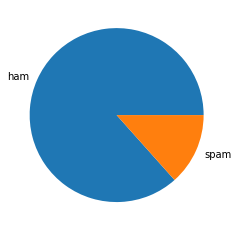

In [6]:
plt.pie(A["Category"].value_counts(),labels=["ham","spam"])

In [11]:
def prep_txt(w):
    import re
    q = re.sub("[^a-zA-Z0-9 ]","",w)
    q = q.lower()
    q = q.split(" ")
#     removing StopWords
    from nltk.corpus import stopwords
    sw = stopwords.words("english")
    from nltk.stem import PorterStemmer,WordNetLemmatizer
    ps = PorterStemmer()
    wnl = WordNetLemmatizer()
    r = ""
    for i in q:
        if(i not in sw):
            t = wnl.lemmatize(i)
            t = ps.stem(t)
            r = r + " " + t
    return r
Q = []
for i in A.Message:
    Q.append(prep_txt(i))

In [16]:
len(np.unique(Q))

5116

In [25]:
Q

[' go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 ' ok lar joke wif u oni',
 ' free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd txt ratetc appli 08452810075over18',
 ' u dun say earli hor u c alreadi say',
 ' nah dont think go usf life around though',
 ' freemsg hey darl 3 week word back id like fun still tb ok xxx std chg send 150 rcv',
 ' even brother like speak treat like aid patent',
 ' per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 ' winner valu network custom select receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour',
 ' mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 ' im gonna home soon dont want talk stuff anymor tonight k ive cri enough today',
 ' six chanc win cash 100 20000 pound txt csh11 send 87575 cost 150pday 6day 16 tsandc appli repli hl 4 info

# Vectorization 

In [26]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=2500)
X = tfidf.fit_transform(Q).toarray()

In [64]:
pickle.dump(tfidf,open("vector.pkl","wb"))

In [29]:
X.shape

(5572, 2500)

In [14]:
A.Category

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Category, Length: 5572, dtype: object

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(A.Category)

In [31]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
Y 

array([0, 0, 1, ..., 0, 0, 0])

In [33]:
from sklearn .model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=5)

In [34]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix
gnb = GaussianNB()
bnb = BernoulliNB()
model = gnb.fit(xtrain,ytrain)
model1 = bnb.fit(xtrain,ytrain)


In [35]:
pred= model.predict(xtest)
print("-----------for GaussianNB---------")
print(accuracy_score(ytest,pred))
print(confusion_matrix(ytest,pred))


-----------for GaussianNB---------
0.8654708520179372
[[828 142]
 [  8 137]]


In [36]:
pred1 = model1.predict(xtest)
print("----------for BernoulliNB---------")
print(accuracy_score(ytest,pred1))
print(confusion_matrix(ytest,pred1))

----------for BernoulliNB---------
0.9838565022421525
[[969   1]
 [ 17 128]]


In [42]:
xtest.shape

(1115, 2500)

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200,max_depth=20)
model3 = rfc.fit(xtrain,ytrain)

pred1= model3.predict(xtest)
print("-----------for RandomForestClassifier---------")
print(accuracy_score(ytest,pred1))
print(confusion_matrix(ytest,pred1))




-----------for RandomForestClassifier---------
0.9515695067264573
[[970   0]
 [ 54  91]]


# Using NN

In [46]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [54]:
nn = Sequential()
nn.add(Dense(120,activation="relu",input_dim=(2500)))

nn.add(Dense(220,activation="relu"))
nn.add(Dense(1,activation="sigmoid"))

nn.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
nn.fit(xtrain,ytrain,epochs=30,validation_data=(xtest,ytest))

Epoch 1/30
140/140 [==============================] - 3s 9ms/step - loss: 0.2653 - accuracy: 0.8898 - val_loss: 0.1167 - val_accuracy: 0.9758
Epoch 2/30
140/140 [==============================] - 1s 6ms/step - loss: 0.0607 - accuracy: 0.9852 - val_loss: 0.0592 - val_accuracy: 0.9848
Epoch 3/30
140/140 [==============================] - 1s 6ms/step - loss: 0.0161 - accuracy: 0.9962 - val_loss: 0.0619 - val_accuracy: 0.9830
Epoch 4/30
140/140 [==============================] - 1s 6ms/step - loss: 0.0071 - accuracy: 0.9984 - val_loss: 0.0655 - val_accuracy: 0.9865
Epoch 5/30
140/140 [==============================] - 1s 6ms/step - loss: 0.0043 - accuracy: 0.9991 - val_loss: 0.0666 - val_accuracy: 0.9857
Epoch 6/30
140/140 [==============================] - 1s 10ms/step - loss: 0.0031 - accuracy: 0.9996 - val_loss: 0.0705 - val_accuracy: 0.9865
Epoch 7/30
140/140 [==============================] - 2s 11ms/step - loss: 0.0029 - accuracy: 0.9996 - val_loss: 0.0694 - val_accuracy: 0.9857
Epoc

# Output

In [61]:
inp = input("Enter Your Email")
prep = prep_txt(inp)
vec = tfidf.transform([prep]).toarray()
prede = model1.predict(vec)
print(prede)


Enter Your EmailHello  I introduce myself Santi Maulidawati, personal assistant for clients needing a architect.  One of my clients specifically asked me to contact you because your profile (Mahesh Pawar - Aurangabad) caught his full attention among several others that I offered him.  All the details of his request can be found here. If you are interested in this type of request, you can click on "Reply for free". He is around Aurangabad.  If you do not wish or cannot get in touch with this client, can you let me know as soon as possible? This will allow me not to contact you again for this type of request. Indeed, I very regularly have clients urgently looking for a architect. So if you are interested, I will be able to direct them to you for free if you deal with these requests.  A big thank you for your help and for your availability.  If you have any questions about the operation after consulting the details of the case, do not hesitate to contact me.  Santi Maulidawati Private per

In [62]:
import pickle 

In [63]:
pickle.dump(model1,open("email_Classification.pkl","wb"))